In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from webrep import repo

### Fetch functions

In [61]:
def getAvgSales(data):
    avgsales = 0
    for salesval in data['Sales']:
        avgsales += int(salesval)

    avgsales /= len(data['Sales'])
    return int(avgsales)

def getAvgPrice(data):
    avgprice = 0
    for salesval in data['Prices']:
        avgprice += int(salesval)

    avgprice /= len(data['Prices'])
    return int(avgprice)

def getEngineSize(data):
    engine = 0
    try:
        engine = data['Engine']['Engine Displacement'].split(' ')[0]
    except:
        engine = 1000

    return int(engine)

def getPower(data):
    power = 0
    try:
        power = data['Engine']['Max Power'].split('PS')[0]
    except:
        power = 1
        
    return int(power)

def getNetRevenue(data):
    return float(getAvgSales(data) * getAvgPrice(data))

def getLength(data):
    length = 0
    try:
        length = data['Dimensions']['Length']
    except:
        power = 1

    return int(length)

def getForm(data):
    ratio = 1
    try:
        length = int(data['Dimensions']['Length'])
        height = int(data['Dimensions']['Height'])
        ratio = length/4000 * length/height
    except:
        ratio = 1

    return int(data['Dimensions']['Height'])

### Price to sales plot

Skipped


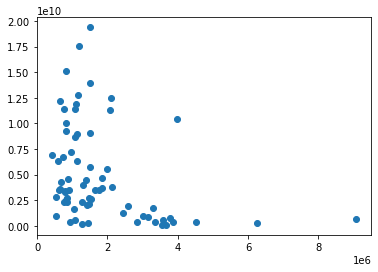

In [44]:
rp = repo('CarPriori-dataset')

xvals = []
yvals = []

for fname in rp.traverseRep():
    try:
        data = rp.getData(fname=fname)
        
        yvals.append(getNetRevenue(data))
        xvals.append(getAvgPrice(data))

    except:
        pass

xpoints = np.array(xvals)
ypoints = np.array(yvals)

plt.plot(xpoints,ypoints,'o')
plt.show()

### Power to sales plot

Skipped


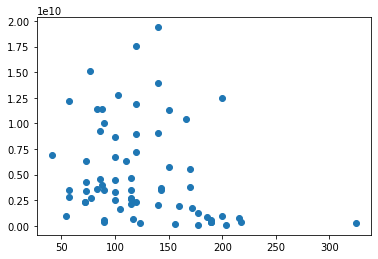

In [45]:
rp = repo('CarPriori-dataset')

xvals = []
yvals = []

for fname in rp.traverseRep():
    try:
        data = rp.getData(fname=fname)

        yvals.append(getNetRevenue(data))
        xvals.append(getPower(data))
    except:
        pass


xpoints = np.array(xvals)
ypoints = np.array(yvals)

plt.plot(xpoints,ypoints,'o')
plt.show()

### Price to engines

Skipped


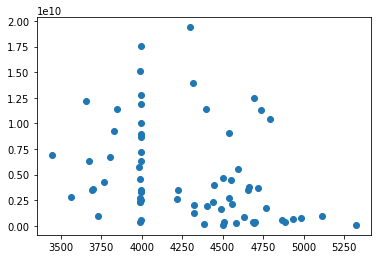

In [47]:
rp = repo('CarPriori-dataset')

xvals = []
yvals = []

for fname in rp.traverseRep():
    try:
        data = rp.getData(fname=fname)

        yvals.append(getNetRevenue(data))
        xvals.append(getLength(data))
    except:
        pass


xpoints = np.array(xvals)
ypoints = np.array(yvals)

plt.plot(xpoints,ypoints,'o')
plt.show()

Skipped


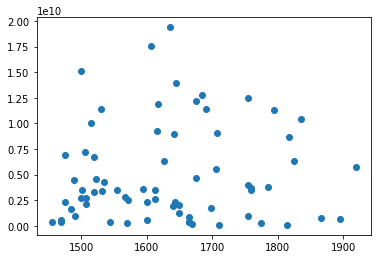

In [53]:
rp = repo('CarPriori-dataset')

xvals = []
yvals = []

for fname in rp.traverseRep():
    try:
        data = rp.getData(fname=fname)

        yvals.append(getNetRevenue(data))
        xvals.append(getForm(data))
    except:
        pass


xpoints = np.array(xvals)
ypoints = np.array(yvals)

plt.plot(xpoints,ypoints,'o')
plt.show()

### Generating csv

In [62]:
rp = repo('CarPriori-dataset')

with open('dataset.csv',mode='w') as f:
    f.write('Car,Company,Engine,Power,Length,Width,Height,Wheelbase,Price,Sales\n')
    for fname in rp.traverseRep():
        try:
            data = rp.getData(fname=fname)
            line = data['Car'] + ','
            line += data['Company'] + ','
            line += str(getEngineSize(data)) + ','
            line += str(getPower(data)) + ','
            line += data['Dimensions']['Length'] + ','
            line += data['Dimensions']['Width'] + ','
            line += data['Dimensions']['Height'] + ','
            line += data['Dimensions']['Wheelbase'] + ','
            line += str(getAvgPrice(data)) + ','
            line += str(getAvgSales(data))
            line += '\n'
            f.write(line)
        except:
            pass

Skipped
